0. Tools I got familiar with with this assignment:
   1. The Python programming language
   2. Packages to be used: numpy, matplotlib, seaborn, pandas and sci-kit learn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

00. Consider the following Concrete Compressive Strength dataset


In [ ]:
data = pd.read_csv("Concrete_Data.csv")

1. The first 8 columns indicate features such as cement quantity, age, etc.
These are to be used to predict the final column ‘Concrete compressive
strength(MPa, megapascals)’ which is the Target variable (that is, the
predicted variable). Divide the dataset into Training, Test datasets using a
70:30 ratio.


In [ ]:
Concrete_X_Features = data.iloc[:, :-1]
Concrete_y_Compressive_Strength = data.iloc[:, -1]

Concrete_X_Features_train, Concrete_X_Features_test, Concrete_y_Compressive_Strength_train, Concrete_y_Compressive_Strength_test = train_test_split(Concrete_X_Features, Concrete_y_Compressive_Strength, test_size=0.3,random_state=0)

In [ ]:
print('Concrete_X_Features_train.size =',Concrete_X_Features_train.size)
print('Concrete_X_Features_test.size =', Concrete_X_Features_test.size)
print('Concerte_y_Compressive_Strength_train.size =',Concrete_y_Compressive_Strength_train.size)
print('Concerte_y_Compressive_Strength_test.size = ', Concrete_y_Compressive_Strength_test.size)
print()
print('Train Dataset Ratios')
print('Concrete_X_Features Ratio =',Concrete_X_Features_train.size*100/Concrete_X_Features.size, ':',
                                    Concrete_X_Features_test.size*100/Concrete_X_Features.size )
print('Concrete_y_Compressive_Strength =', Concrete_y_Compressive_Strength_train.size*100/Concrete_y_Compressive_Strength.size,':',
                                           Concrete_y_Compressive_Strength_test.size*100/Concrete_y_Compressive_Strength.size)

Concrete_X_Features_train.size = 5768
Concrete_X_Features_test.size = 2472
Concerte_y_Compressive_Strength_train.size = 721
Concerte_y_Compressive_Strength_test.size =  309

Train Dataset Ratios
Concrete_X_Features Ratio = 70.0 : 30.0
Concrete_y_Compressive_Strength = 70.0 : 30.0


2. Obtain a linear regression fit for predicting the compressive strength from
fitting the linear regression model on just the Training dataset. Use
R-squared value (coefficient of determination) and mean Square error as
evaluation metrics

In [ ]:
reg = LinearRegression()
regression  = reg.fit(Concrete_X_Features_train, Concrete_y_Compressive_Strength_train)
Concrete_y_Compressive_Strength_pred = reg.predict(Concrete_X_Features_test)


Mean_Squared_Error_train = mean_squared_error(Concrete_y_Compressive_Strength_train, reg.predict(Concrete_X_Features_train))

R_squared_Value_train = r2_score(Concrete_y_Compressive_Strength_train, reg.predict(Concrete_X_Features_train))

Mean_Squared_Error_test = mean_squared_error(Concrete_y_Compressive_Strength_test, Concrete_y_Compressive_Strength_pred)

R_squared_Value_test = r2_score(Concrete_y_Compressive_Strength_test, Concrete_y_Compressive_Strength_pred)

3. Using the trained model, predict the value of ‘Concrete compressive
strength’ for the given Test data in the submission.csv file

In [ ]:
Concrete_y_Compressive_Strength_pred = reg.predict(Concrete_X_Features_test)


submission = pd.DataFrame({'y_pred': Concrete_y_Compressive_Strength_pred})
submission.to_csv('submission.csv', index=False)

4. Obtain the following values.

a. Mean Squared error and R-squared value for training data and test
data respectively.



In [ ]:
Mean_Squared_Error_train = mean_squared_error(Concrete_y_Compressive_Strength_train, reg.predict(Concrete_X_Features_train))

R_squared_Value_train = r2_score(Concrete_y_Compressive_Strength_train, reg.predict(Concrete_X_Features_train))

Mean_Squared_Error_test = mean_squared_error(Concrete_y_Compressive_Strength_test, Concrete_y_Compressive_Strength_pred)

R_squared_Value_test = r2_score(Concrete_y_Compressive_Strength_test, Concrete_y_Compressive_Strength_pred)


print('Mean Squared Error for training data:', Mean_Squared_Error_train)
print("R-squared Value for training data:", R_squared_Value_train)
print("Mean Squared Error for test data:",Mean_Squared_Error_test)
print("R-squared Value for test data:", R_squared_Value_test)

Mean Squared Error for training data: 113.39276287915223
R-squared Value for training data: 0.6066613439796211
Mean Squared Error for test data: 93.61873598596337
R-squared Value for test data: 0.6352987285077925


b. Plot the scatter plot for ytrue against ypredicted
for training and test data
respectively.

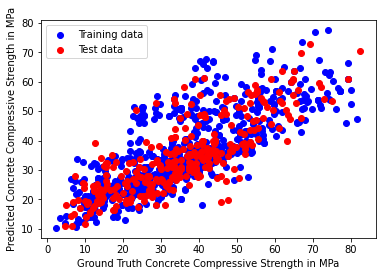

In [ ]:
plt.scatter(Concrete_y_Compressive_Strength_train, reg.predict(Concrete_X_Features_train), c='blue', label='Training data')
plt.scatter(Concrete_y_Compressive_Strength_test, Concrete_y_Compressive_Strength_pred, c='red', label='Test data')
plt.xlabel('Ground Truth Concrete Compressive Strength in MPa')
plt.ylabel('Predicted Concrete Compressive Strength in MPa')
plt.legend()
plt.show()

5. Upload the sumission.csv file and submit the code as a single .ipynb file.
We will provide details of the submission process later in class.